In [1]:
import matplotlib.pyplot as plt
import numpy as np
import re
import ast 
import torch

In [2]:
def val_extractor(file_name1, file_name2, file_name3):    
    
    test_accuracy_seed1 = 0
    sparsity_average_seed1 = 0
    selectivity_average_seed1 = 0
    
    test_accuracy_seed2 = 0
    sparsity_average_seed2 = 0
    selectivity_average_seed2 = 0
    
    test_accuracy_seed3 = 0
    sparsity_average_seed3 = 0
    selectivity_average_seed3 = 0
    
    # index 0 --> test acc (list)
    # index 1 --> sparsity (list) 
    # index 3 --> selectivity (list)
    
    with open(file_name1) as fi:
        for i, line in enumerate(fi):
            if i == 0:
                test_accuracy_seed1 = ast.literal_eval(line)     
            if i == 1:
                sparsity_average_seed1 = ast.literal_eval(line)
            if i == 3:
                selectivity_average_seed1 = ast.literal_eval(line)
                
    with open(file_name2) as fi:
        for i, line in enumerate(fi):
            if i == 0:
                test_accuracy_seed2 = ast.literal_eval(line)     
            if i == 1:
                sparsity_average_seed2 = ast.literal_eval(line)
            if i == 3:
                selectivity_average_seed2 = ast.literal_eval(line)
                
    with open(file_name3) as fi:
        for i, line in enumerate(fi):
            if i == 0:
                test_accuracy_seed3 = ast.literal_eval(line)     
            if i == 1:
                sparsity_average_seed3 = ast.literal_eval(line)
            if i == 3:
                selectivity_average_seed3 = ast.literal_eval(line)
    
    acc_avg = list()
    acc_se  = list()

    spar_avg = list()
    spar_se  = list()

    selec_avg = list()
    selec_se  = list()

    for i in range(len(test_accuracy_seed1)):
        acc_avg.append(np.mean([test_accuracy_seed1[i], test_accuracy_seed2[i], test_accuracy_seed3[i]]))
        acc_se .append(np.std ([test_accuracy_seed1[i], test_accuracy_seed2[i], test_accuracy_seed3[i]]) / np.sqrt(3))

        spar_avg.append(np.mean([sparsity_average_seed1[i], sparsity_average_seed2[i], sparsity_average_seed3[i]]))
        spar_se .append(np.std ([sparsity_average_seed1[i], sparsity_average_seed2[i], sparsity_average_seed3[i]]) / np.sqrt(3))

        selec_avg.append(np.mean([selectivity_average_seed1[i], selectivity_average_seed2[i], selectivity_average_seed3[i]]))
        selec_se .append(np.std ([selectivity_average_seed1[i], selectivity_average_seed2[i], selectivity_average_seed3[i]]) / np.sqrt(3))
    
                
    return acc_avg, acc_se, spar_avg, spar_se, selec_avg, selec_se

In [3]:
def val_extractor_extract_last(file_name1, file_name2, file_name3):    
    
    test_accuracy_seed1 = 0
    sparsity_average_seed1 = 0
    selectivity_average_seed1 = 0
    
    test_accuracy_seed2 = 0
    sparsity_average_seed2 = 0
    selectivity_average_seed2 = 0
    
    test_accuracy_seed3 = 0
    sparsity_average_seed3 = 0
    selectivity_average_seed3 = 0
    
    # index 0 --> test acc (list)
    # index 1 --> sparsity (list) 
    # index 3 --> selectivity (list)
    
    with open(file_name1) as fi:
        for i, line in enumerate(fi):
            if i == 0:
                test_accuracy_seed1 = ast.literal_eval(line)     
            if i == 1:
                sparsity_average_seed1 = ast.literal_eval(line)
            if i == 3:
                selectivity_average_seed1 = ast.literal_eval(line)
                
    with open(file_name2) as fi:
        for i, line in enumerate(fi):
            if i == 0:
                test_accuracy_seed2 = ast.literal_eval(line)     
            if i == 1:
                sparsity_average_seed2 = ast.literal_eval(line)
            if i == 3:
                selectivity_average_seed2 = ast.literal_eval(line)
                
    with open(file_name3) as fi:
        for i, line in enumerate(fi):
            if i == 0:
                test_accuracy_seed3 = ast.literal_eval(line)     
            if i == 1:
                sparsity_average_seed3 = ast.literal_eval(line)
            if i == 3:
                selectivity_average_seed3 = ast.literal_eval(line)
    
    acc_avg = list()
    acc_se  = list()

    spar_avg = list()
    spar_se  = list()

    selec_avg = list()
    selec_se  = list()

    for i in range(len(test_accuracy_seed1)):
        acc_avg.append(np.mean([test_accuracy_seed1[i], test_accuracy_seed2[i], test_accuracy_seed3[i]]))
        acc_se .append(np.std ([test_accuracy_seed1[i], test_accuracy_seed2[i], test_accuracy_seed3[i]]) / np.sqrt(3))

        spar_avg.append(np.mean([sparsity_average_seed1[i], sparsity_average_seed2[i], sparsity_average_seed3[i]]))
        spar_se .append(np.std ([sparsity_average_seed1[i], sparsity_average_seed2[i], sparsity_average_seed3[i]]) / np.sqrt(3))

        selec_avg.append(np.mean([selectivity_average_seed1[i], selectivity_average_seed2[i], selectivity_average_seed3[i]]))
        selec_se .append(np.std ([selectivity_average_seed1[i], selectivity_average_seed2[i], selectivity_average_seed3[i]]) / np.sqrt(3))
    
                
    return acc_avg[-1], acc_se[-1], spar_avg[-1], spar_se[-1], selec_avg[-1], selec_se[-1]

In [4]:
# batch size == 1
b1_sgd_acc_avg,   b1_sgd_acc_se,   b1_sgd_spar_avg,   b1_sgd_spar_se,   b1_sgd_selec_avg,   b1_sgd_selec_se   = val_extractor('seed1/batchsize1/seed_1_batchsize_1_50_SGD.txt',      'seed100/batchsize1/seed_100_batchsize_1_50_SGD.txt',      'seed1234/batchsize1/seed_1234_batchsize_1_50_SGD.txt')
b1_grad_acc_avg,  b1_grad_acc_se,  b1_grad_spar_avg,  b1_grad_spar_se,  b1_grad_selec_avg,  b1_grad_selec_se  = val_extractor('seed1/batchsize1/seed_1_batchsize_1_50_Adagrad.txt',  'seed100/batchsize1/seed_100_batchsize_1_50_Adagrad.txt',  'seed1234/batchsize1/seed_1234_batchsize_1_50_Adagrad.txt')
b1_delta_acc_avg, b1_delta_acc_se, b1_delta_spar_avg, b1_delta_spar_se, b1_delta_selec_avg, b1_delta_selec_se = val_extractor('seed1/batchsize1/seed_1_batchsize_1_50_Adadelta.txt', 'seed100/batchsize1/seed_100_batchsize_1_50_Adadelta.txt', 'seed1234/batchsize1/seed_1234_batchsize_1_50_Adadelta.txt')
b1_adam_acc_avg,  b1_adam_acc_se,  b1_adam_spar_avg,  b1_adam_spar_se,  b1_adam_selec_avg,  b1_adam_selec_se  = val_extractor('seed1/batchsize1/seed_1_batchsize_1_50_Adam.txt',     'seed100/batchsize1/seed_100_batchsize_1_50_Adam.txt',     'seed1234/batchsize1/seed_1234_batchsize_1_50_Adam.txt')

# batch size == 5
b5_sgd_acc_avg,   b5_sgd_acc_se,   b5_sgd_spar_avg,   b5_sgd_spar_se,   b5_sgd_selec_avg,   b5_sgd_selec_se   = val_extractor('seed1/batchsize5/seed_1_batchsize_5_50_SGD.txt',      'seed100/batchsize5/seed_100_batchsize_5_50_SGD.txt',      'seed1234/batchsize5/seed_1234_batchsize_5_50_SGD.txt')
b5_grad_acc_avg,  b5_grad_acc_se,  b5_grad_spar_avg,  b5_grad_spar_se,  b5_grad_selec_avg,  b5_grad_selec_se  = val_extractor('seed1/batchsize5/seed_1_batchsize_5_50_Adagrad.txt',  'seed100/batchsize5/seed_100_batchsize_5_50_Adagrad.txt',  'seed1234/batchsize5/seed_1234_batchsize_5_50_Adagrad.txt')
b5_delta_acc_avg, b5_delta_acc_se, b5_delta_spar_avg, b5_delta_spar_se, b5_delta_selec_avg, b5_delta_selec_se = val_extractor('seed1/batchsize5/seed_1_batchsize_5_50_Adadelta.txt', 'seed100/batchsize5/seed_100_batchsize_5_50_Adadelta.txt', 'seed1234/batchsize5/seed_1234_batchsize_5_50_Adadelta.txt')
b5_adam_acc_avg,  b5_adam_acc_se,  b5_adam_spar_avg,  b5_adam_spar_se,  b5_adam_selec_avg,  b5_adam_selec_se  = val_extractor('seed1/batchsize5/seed_1_batchsize_5_50_Adam.txt',     'seed100/batchsize5/seed_100_batchsize_5_50_Adam.txt',     'seed1234/batchsize5/seed_1234_batchsize_5_50_Adam.txt')

# batch size == 10

b10_sgd_acc_avg,   b10_sgd_acc_se,   b10_sgd_spar_avg,   b10_sgd_spar_se,   b10_sgd_selec_avg,   b10_sgd_selec_se   = val_extractor('seed1/batchsize10/seed_1_batchsize_10_50_SGD.txt',      'seed100/batchsize10/seed_100_batchsize_10_50_SGD.txt',      'seed1234/batchsize10/seed_1234_batchsize_10_50_SGD.txt')
b10_grad_acc_avg,  b10_grad_acc_se,  b10_grad_spar_avg,  b10_grad_spar_se,  b10_grad_selec_avg,  b10_grad_selec_se  = val_extractor('seed1/batchsize10/seed_1_batchsize_10_50_Adagrad.txt',  'seed100/batchsize10/seed_100_batchsize_10_50_Adagrad.txt',  'seed1234/batchsize10/seed_1234_batchsize_10_50_Adagrad.txt')
b10_delta_acc_avg, b10_delta_acc_se, b10_delta_spar_avg, b10_delta_spar_se, b10_delta_selec_avg, b10_delta_selec_se = val_extractor('seed1/batchsize10/seed_1_batchsize_10_50_Adadelta.txt', 'seed100/batchsize10/seed_100_batchsize_10_50_Adadelta.txt', 'seed1234/batchsize10/seed_1234_batchsize_10_50_Adadelta.txt')
b10_adam_acc_avg,  b10_adam_acc_se,  b10_adam_spar_avg,  b10_adam_spar_se,  b10_adam_selec_avg,  b10_adam_selec_se  = val_extractor('seed1/batchsize10/seed_1_batchsize_10_50_Adam.txt',     'seed100/batchsize10/seed_100_batchsize_10_50_Adam.txt',     'seed1234/batchsize10/seed_1234_batchsize_10_50_Adam.txt')

# batch size == 50 

b50_sgd_acc_avg,   b50_sgd_acc_se,   b50_sgd_spar_avg,   b50_sgd_spar_se,   b50_sgd_selec_avg,   b50_sgd_selec_se   = val_extractor('seed1/batchsize50/seed_1_batchsize_50_50_SGD.txt',      'seed100/batchsize50/seed_100_batchsize_50_50_SGD.txt',      'seed1234/batchsize50/seed_1234_batchsize_50_50_SGD.txt')
b50_grad_acc_avg,  b50_grad_acc_se,  b50_grad_spar_avg,  b50_grad_spar_se,  b50_grad_selec_avg,  b50_grad_selec_se  = val_extractor('seed1/batchsize50/seed_1_batchsize_50_50_Adagrad.txt',  'seed100/batchsize50/seed_100_batchsize_50_50_Adagrad.txt',  'seed1234/batchsize50/seed_1234_batchsize_50_50_Adagrad.txt')
b50_delta_acc_avg, b50_delta_acc_se, b50_delta_spar_avg, b50_delta_spar_se, b50_delta_selec_avg, b50_delta_selec_se = val_extractor('seed1/batchsize50/seed_1_batchsize_50_50_Adadelta.txt', 'seed100/batchsize50/seed_100_batchsize_50_50_Adadelta.txt', 'seed1234/batchsize50/seed_1234_batchsize_50_50_Adadelta.txt')
b50_adam_acc_avg,  b50_adam_acc_se,  b50_adam_spar_avg,  b50_adam_spar_se,  b50_adam_selec_avg,  b50_adam_selec_se  = val_extractor('seed1/batchsize50/seed_1_batchsize_50_50_Adam.txt',     'seed100/batchsize50/seed_100_batchsize_50_50_Adam.txt',     'seed1234/batchsize50/seed_1234_batchsize_50_50_Adam.txt')

# batch size == 200 

b200_sgd_acc_avg,   b200_sgd_acc_se,   b200_sgd_spar_avg,   b200_sgd_spar_se,   b200_sgd_selec_avg,   b200_sgd_selec_se   = val_extractor('seed1/batchsize200/seed_1_batchsize_200_50_SGD.txt',      'seed100/batchsize200/seed_100_batchsize_200_50_SGD.txt',      'seed1234/batchsize200/seed_1234_batchsize_200_50_SGD.txt')
b200_grad_acc_avg,  b200_grad_acc_se,  b200_grad_spar_avg,  b200_grad_spar_se,  b200_grad_selec_avg,  b200_grad_selec_se  = val_extractor('seed1/batchsize200/seed_1_batchsize_200_50_Adagrad.txt',  'seed100/batchsize200/seed_100_batchsize_200_50_Adagrad.txt',  'seed1234/batchsize200/seed_1234_batchsize_200_50_Adagrad.txt')
b200_delta_acc_avg, b200_delta_acc_se, b200_delta_spar_avg, b200_delta_spar_se, b200_delta_selec_avg, b200_delta_selec_se = val_extractor('seed1/batchsize200/seed_1_batchsize_200_50_Adadelta.txt', 'seed100/batchsize200/seed_100_batchsize_200_50_Adadelta.txt', 'seed1234/batchsize200/seed_1234_batchsize_200_50_Adadelta.txt')
b200_adam_acc_avg,  b200_adam_acc_se,  b200_adam_spar_avg,  b200_adam_spar_se,  b200_adam_selec_avg,  b200_adam_selec_se  = val_extractor('seed1/batchsize200/seed_1_batchsize_200_50_Adam.txt',     'seed100/batchsize200/seed_100_batchsize_200_50_Adam.txt',     'seed1234/batchsize200/seed_1234_batchsize_200_50_Adam.txt')


# batch size == 500 

b500_sgd_acc_avg,   b500_sgd_acc_se,   b500_sgd_spar_avg,   b500_sgd_spar_se,   b500_sgd_selec_avg,   b500_sgd_selec_se   = val_extractor('seed1/batchsize500/seed_1_batchsize_500_50_SGD.txt',      'seed100/batchsize500/seed_100_batchsize_500_50_SGD.txt',      'seed1234/batchsize500/seed_1234_batchsize_500_50_SGD.txt')
b500_grad_acc_avg,  b500_grad_acc_se,  b500_grad_spar_avg,  b500_grad_spar_se,  b500_grad_selec_avg,  b500_grad_selec_se  = val_extractor('seed1/batchsize500/seed_1_batchsize_500_50_Adagrad.txt',  'seed100/batchsize500/seed_100_batchsize_500_50_Adagrad.txt',  'seed1234/batchsize500/seed_1234_batchsize_500_50_Adagrad.txt')
b500_delta_acc_avg, b500_delta_acc_se, b500_delta_spar_avg, b500_delta_spar_se, b500_delta_selec_avg, b500_delta_selec_se = val_extractor('seed1/batchsize500/seed_1_batchsize_500_50_Adadelta.txt', 'seed100/batchsize500/seed_100_batchsize_500_50_Adadelta.txt', 'seed1234/batchsize500/seed_1234_batchsize_500_50_Adadelta.txt')
b500_adam_acc_avg,  b500_adam_acc_se,  b500_adam_spar_avg,  b500_adam_spar_se,  b500_adam_selec_avg,  b500_adam_selec_se  = val_extractor('seed1/batchsize500/seed_1_batchsize_500_50_Adam.txt',     'seed100/batchsize500/seed_100_batchsize_500_50_Adam.txt',     'seed1234/batchsize500/seed_1234_batchsize_500_50_Adam.txt')

# batch size == 1000 

b1000_sgd_acc_avg,   b1000_sgd_acc_se,   b1000_sgd_spar_avg,   b1000_sgd_spar_se,   b1000_sgd_selec_avg,   b1000_sgd_selec_se   = val_extractor('seed1/batchsize1000/seed_1_batchsize_1000_50_SGD.txt',      'seed100/batchsize1000/seed_100_batchsize_1000_50_SGD.txt',      'seed1234/batchsize1000/seed_1234_batchsize_1000_50_SGD.txt')
b1000_grad_acc_avg,  b1000_grad_acc_se,  b1000_grad_spar_avg,  b1000_grad_spar_se,  b1000_grad_selec_avg,  b1000_grad_selec_se  = val_extractor('seed1/batchsize1000/seed_1_batchsize_1000_50_Adagrad.txt',  'seed100/batchsize1000/seed_100_batchsize_1000_50_Adagrad.txt',  'seed1234/batchsize1000/seed_1234_batchsize_1000_50_Adagrad.txt')
b1000_delta_acc_avg, b1000_delta_acc_se, b1000_delta_spar_avg, b1000_delta_spar_se, b1000_delta_selec_avg, b1000_delta_selec_se = val_extractor('seed1/batchsize1000/seed_1_batchsize_1000_50_Adadelta.txt', 'seed100/batchsize1000/seed_100_batchsize_1000_50_Adadelta.txt', 'seed1234/batchsize1000/seed_1234_batchsize_1000_50_Adadelta.txt')
b1000_adam_acc_avg,  b1000_adam_acc_se,  b1000_adam_spar_avg,  b1000_adam_spar_se,  b1000_adam_selec_avg,  b1000_adam_selec_se  = val_extractor('seed1/batchsize1000/seed_1_batchsize_1000_50_Adam.txt',     'seed100/batchsize1000/seed_100_batchsize_1000_50_Adam.txt',     'seed1234/batchsize1000/seed_1234_batchsize_1000_50_Adam.txt')

In [5]:
# accuracy

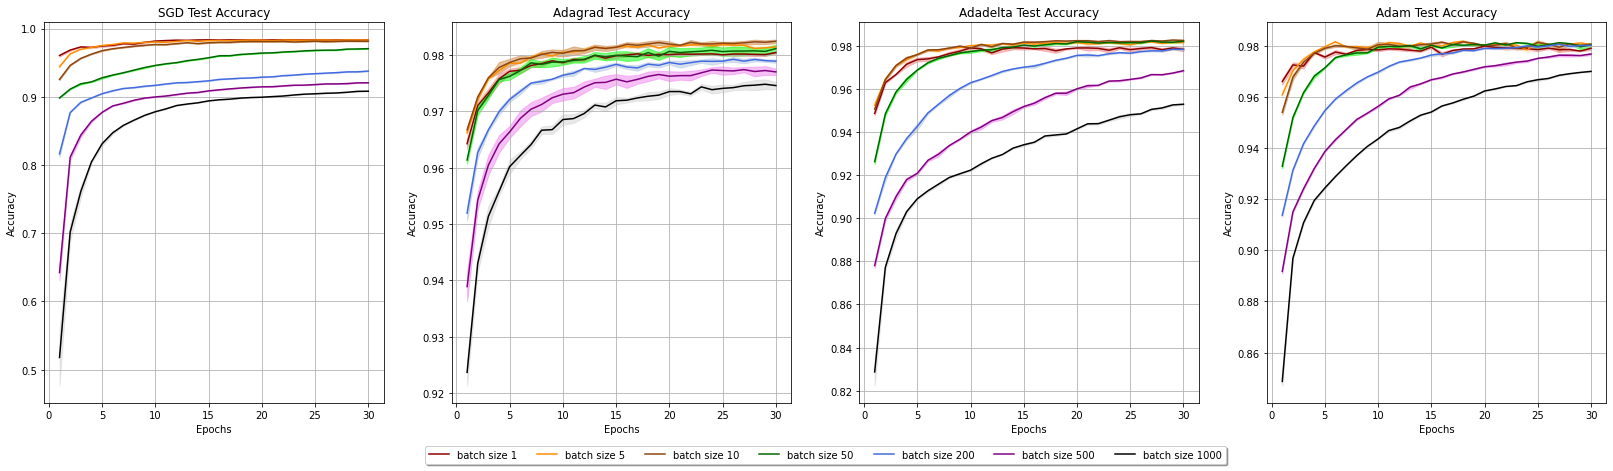

In [6]:
e30 = np.linspace(1, 30, 30)

fig, (ax1, ax2, ax3, ax4) = plt.subplots(1, 4, figsize=(28, 7))

# ax1 == SGD 
# ax2 == Adagrad 
# ax3 == Adadelta 
# ax4 == Adam 

# SGD
# batch 1 
ax1.plot(e30, b1_sgd_acc_avg, c='darkred', label='batch size 1')
ax1.fill_between(e30, np.subtract(b1_sgd_acc_avg, b1_sgd_acc_se), np.add(b1_sgd_acc_avg, b1_sgd_acc_se), color='lightcoral', alpha=0.5)
# batch 5
ax1.plot(e30, b5_sgd_acc_avg, c='darkorange', label='batch size 5')
ax1.fill_between(e30, np.subtract(b5_sgd_acc_avg, b5_sgd_acc_se), np.add(b5_sgd_acc_avg, b5_sgd_acc_se), color='moccasin', alpha=0.5)
# batch 10
ax1.plot(e30, b10_sgd_acc_avg, c='saddlebrown', label='batch size 10')
ax1.fill_between(e30, np.subtract(b10_sgd_acc_avg, b10_sgd_acc_se), np.add(b10_sgd_acc_avg, b10_sgd_acc_se), color='peru', alpha=0.5)
# batch 50
ax1.plot(e30, b50_sgd_acc_avg, c='darkgreen', label='batch size 50')
ax1.fill_between(e30, np.subtract(b50_sgd_acc_avg, b50_sgd_acc_se), np.add(b50_sgd_acc_avg, b50_sgd_acc_se), color='lime', alpha=0.5)
# batch 200
ax1.plot(e30, b200_sgd_acc_avg, c='royalblue', label='batch size 200')
ax1.fill_between(e30, np.subtract(b200_sgd_acc_avg, b200_sgd_acc_se), np.add(b200_sgd_acc_avg, b200_sgd_acc_se), color='lightsteelblue', alpha=0.5)
# batch 500
ax1.plot(e30, b500_sgd_acc_avg, c='purple', label='batch size 500')
ax1.fill_between(e30, np.subtract(b500_sgd_acc_avg, b500_sgd_acc_se), np.add(b500_sgd_acc_avg, b500_sgd_acc_se), color='violet', alpha=0.5)
# batch 1000
ax1.plot(e30, b1000_sgd_acc_avg, c='black', label='batch size 1000')
ax1.fill_between(e30, np.subtract(b1000_sgd_acc_avg, b1000_sgd_acc_se), np.add(b1000_sgd_acc_avg, b1000_sgd_acc_se), color='lightgrey', alpha=0.5)

ax1.set_title('SGD Test Accuracy')
ax1.set_xlabel('Epochs')
ax1.set_ylabel('Accuracy')


# Adagrad
# batch 1 
ax2.plot(e30, b1_grad_acc_avg, c='darkred', label='batch size 1')
ax2.fill_between(e30, np.subtract(b1_grad_acc_avg, b1_grad_acc_se), np.add(b1_grad_acc_avg, b1_grad_acc_se), color='lightcoral', alpha=0.5)
# batch 5
ax2.plot(e30, b5_grad_acc_avg, c='darkorange', label='batch size 5')
ax2.fill_between(e30, np.subtract(b5_grad_acc_avg, b5_grad_acc_se), np.add(b5_grad_acc_avg, b5_grad_acc_se), color='moccasin', alpha=0.5)
# batch 10
ax2.plot(e30, b10_grad_acc_avg, c='saddlebrown', label='batch size 10')
ax2.fill_between(e30, np.subtract(b10_grad_acc_avg, b10_grad_acc_se), np.add(b10_grad_acc_avg, b10_grad_acc_se), color='peru', alpha=0.5)
# batch 50
ax2.plot(e30, b50_grad_acc_avg, c='darkgreen', label='batch size 50')
ax2.fill_between(e30, np.subtract(b50_grad_acc_avg, b50_grad_acc_se), np.add(b50_grad_acc_avg, b50_grad_acc_se), color='lime', alpha=0.5)
# batch 200
ax2.plot(e30, b200_grad_acc_avg, c='royalblue', label='batch size 200')
ax2.fill_between(e30, np.subtract(b200_grad_acc_avg, b200_grad_acc_se), np.add(b200_grad_acc_avg, b200_grad_acc_se), color='lightsteelblue', alpha=0.5)
# batch 500
ax2.plot(e30, b500_grad_acc_avg, c='purple', label='batch size 500')
ax2.fill_between(e30, np.subtract(b500_grad_acc_avg, b500_grad_acc_se), np.add(b500_grad_acc_avg, b500_grad_acc_se), color='violet', alpha=0.5)
# batch 1000
ax2.plot(e30, b1000_grad_acc_avg, c='black', label='batch size 1000')
ax2.fill_between(e30, np.subtract(b1000_grad_acc_avg, b1000_grad_acc_se), np.add(b1000_grad_acc_avg, b1000_grad_acc_se), color='lightgrey', alpha=0.5)

ax2.set_title('Adagrad Test Accuracy')
ax2.set_xlabel('Epochs')
ax2.set_ylabel('Accuracy')

# Adadelta
# batch 1 
ax3.plot(e30, b1_delta_acc_avg, c='darkred', label='batch size 1')
ax3.fill_between(e30, np.subtract(b1_delta_acc_avg, b1_delta_acc_se), np.add(b1_delta_acc_avg, b1_delta_acc_se), color='lightcoral', alpha=0.5)
# batch 5
ax3.plot(e30, b5_delta_acc_avg, c='darkorange', label='batch size 5')
ax3.fill_between(e30, np.subtract(b5_delta_acc_avg, b5_delta_acc_se), np.add(b5_delta_acc_avg, b5_delta_acc_se), color='moccasin', alpha=0.5)
# batch 10
ax3.plot(e30, b10_delta_acc_avg, c='saddlebrown', label='batch size 10')
ax3.fill_between(e30, np.subtract(b10_delta_acc_avg, b10_delta_acc_se), np.add(b10_delta_acc_avg, b10_delta_acc_se), color='peru', alpha=0.5)
# batch 50
ax3.plot(e30, b50_delta_acc_avg, c='darkgreen', label='batch size 50')
ax3.fill_between(e30, np.subtract(b50_delta_acc_avg, b50_delta_acc_se), np.add(b50_delta_acc_avg, b50_delta_acc_se), color='lime', alpha=0.5)
# batch 200
ax3.plot(e30, b200_delta_acc_avg, c='royalblue', label='batch size 200')
ax3.fill_between(e30, np.subtract(b200_delta_acc_avg, b200_delta_acc_se), np.add(b200_delta_acc_avg, b200_delta_acc_se), color='lightsteelblue', alpha=0.5)
# batch 500
ax3.plot(e30, b500_delta_acc_avg, c='purple', label='batch size 500')
ax3.fill_between(e30, np.subtract(b500_delta_acc_avg, b500_delta_acc_se), np.add(b500_delta_acc_avg, b500_delta_acc_se), color='violet', alpha=0.5)
# batch 1000
ax3.plot(e30, b1000_delta_acc_avg, c='black', label='batch size 1000')
ax3.fill_between(e30, np.subtract(b1000_delta_acc_avg, b1000_delta_acc_se), np.add(b1000_delta_acc_avg, b1000_delta_acc_se), color='lightgrey', alpha=0.5)

ax3.set_title('Adadelta Test Accuracy')
ax3.set_xlabel('Epochs')
ax3.set_ylabel('Accuracy')

# Adam
# batch 1 
ax4.plot(e30, b1_adam_acc_avg, c='darkred', label='batch size 1')
ax4.fill_between(e30, np.subtract(b1_adam_acc_avg, b1_adam_acc_se), np.add(b1_adam_acc_avg, b1_adam_acc_se), color='lightcoral', alpha=0.5)
# batch 5
ax4.plot(e30, b5_adam_acc_avg, c='darkorange', label='batch size 5')
ax4.fill_between(e30, np.subtract(b5_adam_acc_avg, b5_adam_acc_se), np.add(b5_adam_acc_avg, b5_adam_acc_se), color='moccasin', alpha=0.5)
# batch 10
ax4.plot(e30, b10_adam_acc_avg, c='saddlebrown', label='batch size 10')
ax4.fill_between(e30, np.subtract(b10_adam_acc_avg, b10_adam_acc_se), np.add(b10_adam_acc_avg, b10_adam_acc_se), color='peru', alpha=0.5)
# batch 50
ax4.plot(e30, b50_adam_acc_avg, c='darkgreen', label='batch size 50')
ax4.fill_between(e30, np.subtract(b50_adam_acc_avg, b50_adam_acc_se), np.add(b50_adam_acc_avg, b50_adam_acc_se), color='lime', alpha=0.5)
# batch 200
ax4.plot(e30, b200_adam_acc_avg, c='royalblue', label='batch size 200')
ax4.fill_between(e30, np.subtract(b200_adam_acc_avg, b200_adam_acc_se), np.add(b200_adam_acc_avg, b200_adam_acc_se), color='lightsteelblue', alpha=0.5)
# batch 500
ax4.plot(e30, b500_adam_acc_avg, c='purple', label='batch size 500')
ax4.fill_between(e30, np.subtract(b500_adam_acc_avg, b500_adam_acc_se), np.add(b500_adam_acc_avg, b500_adam_acc_se), color='violet', alpha=0.5)
# batch 1000
ax4.plot(e30, b1000_adam_acc_avg, c='black', label='batch size 1000')
ax4.fill_between(e30, np.subtract(b1000_adam_acc_avg, b1000_adam_acc_se), np.add(b1000_adam_acc_avg, b1000_adam_acc_se), color='lightgrey', alpha=0.5)

ax4.set_title('Adam Test Accuracy')
ax4.set_xlabel('Epochs')
ax4.set_ylabel('Accuracy')
ax4.legend(loc='upper center', bbox_to_anchor=(-1.3, -0.1),
          fancybox=True, shadow=True, ncol=7)

ax1.grid()
ax2.grid()
ax3.grid()
ax4.grid()

In [7]:
# Sparsity

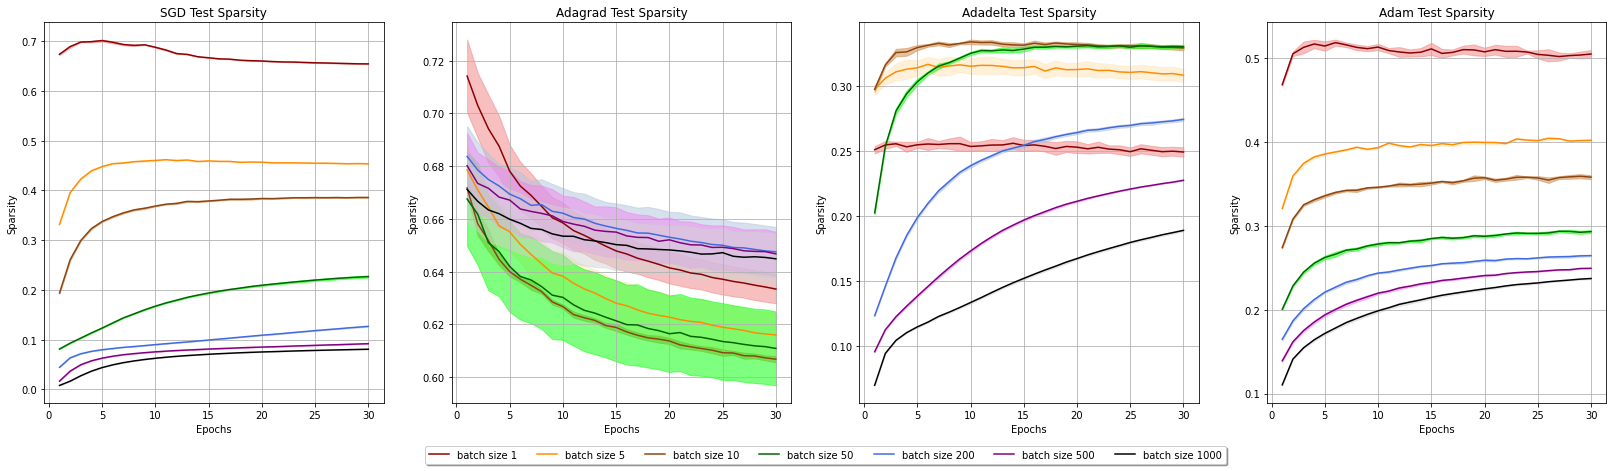

In [8]:
e30 = np.linspace(1, 30, 30)

fig, (ax1, ax2, ax3, ax4) = plt.subplots(1, 4, figsize=(28, 7))

# ax1 == SGD 
# ax2 == Adagrad 
# ax3 == Adadelta 
# ax4 == Adam 

# SGD
# batch 1 
ax1.plot(e30, b1_sgd_spar_avg, c='darkred', label='batch size 1')
ax1.fill_between(e30, np.subtract(b1_sgd_spar_avg, b1_sgd_spar_se), np.add(b1_sgd_spar_avg, b1_sgd_spar_se), color='lightcoral', alpha=0.5)
# batch 5
ax1.plot(e30, b5_sgd_spar_avg, c='darkorange', label='batch size 5')
ax1.fill_between(e30, np.subtract(b5_sgd_spar_avg, b5_sgd_spar_se), np.add(b5_sgd_spar_avg, b5_sgd_spar_se), color='moccasin', alpha=0.5)
# batch 10
ax1.plot(e30, b10_sgd_spar_avg, c='saddlebrown', label='batch size 10')
ax1.fill_between(e30, np.subtract(b10_sgd_spar_avg, b10_sgd_spar_se), np.add(b10_sgd_spar_avg, b10_sgd_spar_se), color='peru', alpha=0.5)
# batch 50
ax1.plot(e30, b50_sgd_spar_avg, c='darkgreen', label='batch size 50')
ax1.fill_between(e30, np.subtract(b50_sgd_spar_avg, b50_sgd_spar_se), np.add(b50_sgd_spar_avg, b50_sgd_spar_se), color='lime', alpha=0.5)
# batch 200
ax1.plot(e30, b200_sgd_spar_avg, c='royalblue', label='batch size 200')
ax1.fill_between(e30, np.subtract(b200_sgd_spar_avg, b200_sgd_spar_se), np.add(b200_sgd_spar_avg, b200_sgd_spar_se), color='lightsteelblue', alpha=0.5)
# batch 500
ax1.plot(e30, b500_sgd_spar_avg, c='purple', label='batch size 500')
ax1.fill_between(e30, np.subtract(b500_sgd_spar_avg, b500_sgd_spar_se), np.add(b500_sgd_spar_avg, b500_sgd_spar_se), color='violet', alpha=0.5)
# batch 1000
ax1.plot(e30, b1000_sgd_spar_avg, c='black', label='batch size 1000')
ax1.fill_between(e30, np.subtract(b1000_sgd_spar_avg, b1000_sgd_spar_se), np.add(b1000_sgd_spar_avg, b1000_sgd_spar_se), color='lightgrey', alpha=0.5)

ax1.set_title('SGD Test Sparsity')
ax1.set_xlabel('Epochs')
ax1.set_ylabel('Sparsity')


# Adagrad
# batch 1 
ax2.plot(e30, b1_grad_spar_avg, c='darkred', label='batch size 1')
ax2.fill_between(e30, np.subtract(b1_grad_spar_avg, b1_grad_spar_se), np.add(b1_grad_spar_avg, b1_grad_spar_se), color='lightcoral', alpha=0.5)
# batch 5
ax2.plot(e30, b5_grad_spar_avg, c='darkorange', label='batch size 5')
ax2.fill_between(e30, np.subtract(b5_grad_spar_avg, b5_grad_spar_se), np.add(b5_grad_spar_avg, b5_grad_spar_se), color='moccasin', alpha=0.5)
# batch 10
ax2.plot(e30, b10_grad_spar_avg, c='saddlebrown', label='batch size 10')
ax2.fill_between(e30, np.subtract(b10_grad_spar_avg, b10_grad_spar_se), np.add(b10_grad_spar_avg, b10_grad_spar_se), color='peru', alpha=0.5)
# batch 50
ax2.plot(e30, b50_grad_spar_avg, c='darkgreen', label='batch size 50')
ax2.fill_between(e30, np.subtract(b50_grad_spar_avg, b50_grad_spar_se), np.add(b50_grad_spar_avg, b50_grad_spar_se), color='lime', alpha=0.5)
# batch 200
ax2.plot(e30, b200_grad_spar_avg, c='royalblue', label='batch size 200')
ax2.fill_between(e30, np.subtract(b200_grad_spar_avg, b200_grad_spar_se), np.add(b200_grad_spar_avg, b200_grad_spar_se), color='lightsteelblue', alpha=0.5)
# batch 500
ax2.plot(e30, b500_grad_spar_avg, c='purple', label='batch size 500')
ax2.fill_between(e30, np.subtract(b500_grad_spar_avg, b500_grad_spar_se), np.add(b500_grad_spar_avg, b500_grad_spar_se), color='violet', alpha=0.5)
# batch 1000
ax2.plot(e30, b1000_grad_spar_avg, c='black', label='batch size 1000')
ax2.fill_between(e30, np.subtract(b1000_grad_spar_avg, b1000_grad_spar_se), np.add(b1000_grad_spar_avg, b1000_grad_spar_se), color='lightgrey', alpha=0.5)

ax2.set_title('Adagrad Test Sparsity')
ax2.set_xlabel('Epochs')
ax2.set_ylabel('Sparsity')

# Adadelta
# batch 1 
ax3.plot(e30, b1_delta_spar_avg, c='darkred', label='batch size 1')
ax3.fill_between(e30, np.subtract(b1_delta_spar_avg, b1_delta_spar_se), np.add(b1_delta_spar_avg, b1_delta_spar_se), color='lightcoral', alpha=0.5)
# batch 5
ax3.plot(e30, b5_delta_spar_avg, c='darkorange', label='batch size 5')
ax3.fill_between(e30, np.subtract(b5_delta_spar_avg, b5_delta_spar_se), np.add(b5_delta_spar_avg, b5_delta_spar_se), color='moccasin', alpha=0.5)
# batch 10
ax3.plot(e30, b10_delta_spar_avg, c='saddlebrown', label='batch size 10')
ax3.fill_between(e30, np.subtract(b10_delta_spar_avg, b10_delta_spar_se), np.add(b10_delta_spar_avg, b10_delta_spar_se), color='peru', alpha=0.5)
# batch 50
ax3.plot(e30, b50_delta_spar_avg, c='darkgreen', label='batch size 50')
ax3.fill_between(e30, np.subtract(b50_delta_spar_avg, b50_delta_spar_se), np.add(b50_delta_spar_avg, b50_delta_spar_se), color='lime', alpha=0.5)
# batch 200
ax3.plot(e30, b200_delta_spar_avg, c='royalblue', label='batch size 200')
ax3.fill_between(e30, np.subtract(b200_delta_spar_avg, b200_delta_spar_se), np.add(b200_delta_spar_avg, b200_delta_spar_se), color='lightsteelblue', alpha=0.5)
# batch 500
ax3.plot(e30, b500_delta_spar_avg, c='purple', label='batch size 500')
ax3.fill_between(e30, np.subtract(b500_delta_spar_avg, b500_delta_spar_se), np.add(b500_delta_spar_avg, b500_delta_spar_se), color='violet', alpha=0.5)
# batch 1000
ax3.plot(e30, b1000_delta_spar_avg, c='black', label='batch size 1000')
ax3.fill_between(e30, np.subtract(b1000_delta_spar_avg, b1000_delta_spar_se), np.add(b1000_delta_spar_avg, b1000_delta_spar_se), color='lightgrey', alpha=0.5)

ax3.set_title('Adadelta Test Sparsity')
ax3.set_xlabel('Epochs')
ax3.set_ylabel('Sparsity')

# Adam
# batch 1 
ax4.plot(e30, b1_adam_spar_avg, c='darkred', label='batch size 1')
ax4.fill_between(e30, np.subtract(b1_adam_spar_avg, b1_adam_spar_se), np.add(b1_adam_spar_avg, b1_adam_spar_se), color='lightcoral', alpha=0.5)
# batch 5
ax4.plot(e30, b5_adam_spar_avg, c='darkorange', label='batch size 5')
ax4.fill_between(e30, np.subtract(b5_adam_spar_avg, b5_adam_spar_se), np.add(b5_adam_spar_avg, b5_adam_spar_se), color='moccasin', alpha=0.5)
# batch 10
ax4.plot(e30, b10_adam_spar_avg, c='saddlebrown', label='batch size 10')
ax4.fill_between(e30, np.subtract(b10_adam_spar_avg, b10_adam_spar_se), np.add(b10_adam_spar_avg, b10_adam_spar_se), color='peru', alpha=0.5)
# batch 50
ax4.plot(e30, b50_adam_spar_avg, c='darkgreen', label='batch size 50')
ax4.fill_between(e30, np.subtract(b50_adam_spar_avg, b50_adam_spar_se), np.add(b50_adam_spar_avg, b50_adam_spar_se), color='lime', alpha=0.5)
# batch 200
ax4.plot(e30, b200_adam_spar_avg, c='royalblue', label='batch size 200')
ax4.fill_between(e30, np.subtract(b200_adam_spar_avg, b200_adam_spar_se), np.add(b200_adam_spar_avg, b200_adam_spar_se), color='lightsteelblue', alpha=0.5)
# batch 500
ax4.plot(e30, b500_adam_spar_avg, c='purple', label='batch size 500')
ax4.fill_between(e30, np.subtract(b500_adam_spar_avg, b500_adam_spar_se), np.add(b500_adam_spar_avg, b500_adam_spar_se), color='violet', alpha=0.5)
# batch 1000
ax4.plot(e30, b1000_adam_spar_avg, c='black', label='batch size 1000')
ax4.fill_between(e30, np.subtract(b1000_adam_spar_avg, b1000_adam_spar_se), np.add(b1000_adam_spar_avg, b1000_adam_spar_se), color='lightgrey', alpha=0.5)

ax4.set_title('Adam Test Sparsity')
ax4.set_xlabel('Epochs')
ax4.set_ylabel('Sparsity')
ax4.legend(loc='upper center', bbox_to_anchor=(-1.3, -0.1),
          fancybox=True, shadow=True, ncol=7)

ax1.grid()
ax2.grid()
ax3.grid()
ax4.grid()

In [9]:
# selectivity

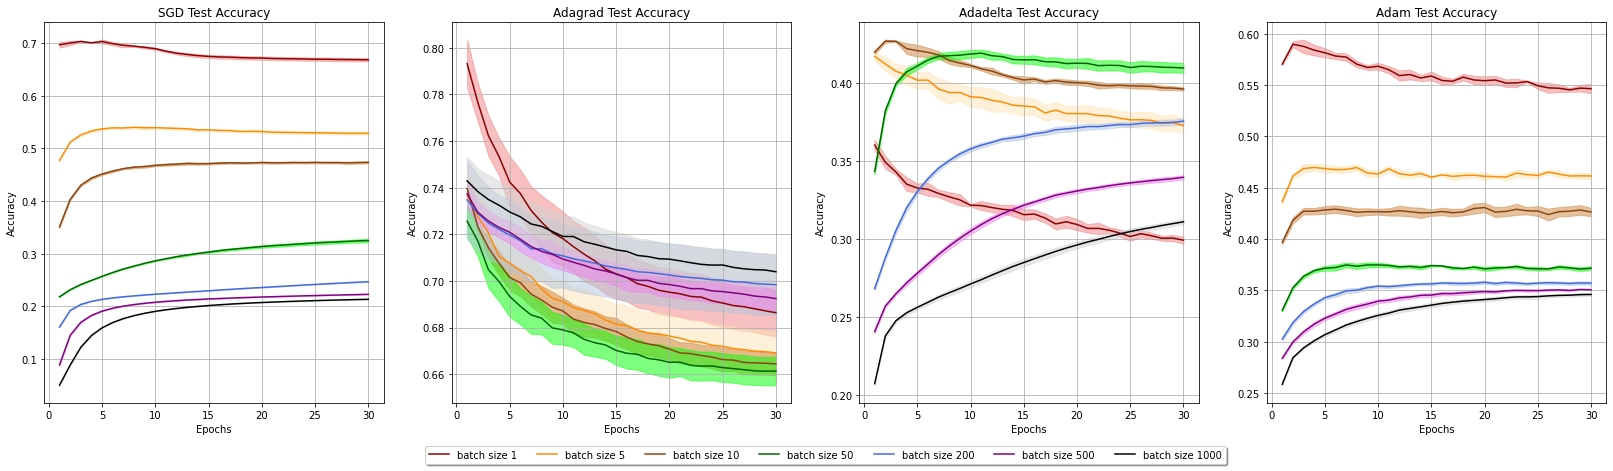

In [10]:
e30 = np.linspace(1, 30, 30)

fig, (ax1, ax2, ax3, ax4) = plt.subplots(1, 4, figsize=(28, 7))

# ax1 == SGD 
# ax2 == Adagrad 
# ax3 == Adadelta 
# ax4 == Adam 

# SGD
# batch 1 
ax1.plot(e30, b1_sgd_selec_avg, c='darkred', label='batch size 1')
ax1.fill_between(e30, np.subtract(b1_sgd_selec_avg, b1_sgd_selec_se), np.add(b1_sgd_selec_avg, b1_sgd_selec_se), color='lightcoral', alpha=0.5)
# batch 5
ax1.plot(e30, b5_sgd_selec_avg, c='darkorange', label='batch size 5')
ax1.fill_between(e30, np.subtract(b5_sgd_selec_avg, b5_sgd_selec_se), np.add(b5_sgd_selec_avg, b5_sgd_selec_se), color='moccasin', alpha=0.5)
# batch 10
ax1.plot(e30, b10_sgd_selec_avg, c='saddlebrown', label='batch size 10')
ax1.fill_between(e30, np.subtract(b10_sgd_selec_avg, b10_sgd_selec_se), np.add(b10_sgd_selec_avg, b10_sgd_selec_se), color='peru', alpha=0.5)
# batch 50
ax1.plot(e30, b50_sgd_selec_avg, c='darkgreen', label='batch size 50')
ax1.fill_between(e30, np.subtract(b50_sgd_selec_avg, b50_sgd_selec_se), np.add(b50_sgd_selec_avg, b50_sgd_selec_se), color='lime', alpha=0.5)
# batch 200
ax1.plot(e30, b200_sgd_selec_avg, c='royalblue', label='batch size 200')
ax1.fill_between(e30, np.subtract(b200_sgd_selec_avg, b200_sgd_selec_se), np.add(b200_sgd_selec_avg, b200_sgd_selec_se), color='lightsteelblue', alpha=0.5)
# batch 500
ax1.plot(e30, b500_sgd_selec_avg, c='purple', label='batch size 500')
ax1.fill_between(e30, np.subtract(b500_sgd_selec_avg, b500_sgd_selec_se), np.add(b500_sgd_selec_avg, b500_sgd_selec_se), color='violet', alpha=0.5)
# batch 1000
ax1.plot(e30, b1000_sgd_selec_avg, c='black', label='batch size 1000')
ax1.fill_between(e30, np.subtract(b1000_sgd_selec_avg, b1000_sgd_selec_se), np.add(b1000_sgd_selec_avg, b1000_sgd_selec_se), color='lightgrey', alpha=0.5)

ax1.set_title('SGD Test Accuracy')
ax1.set_xlabel('Epochs')
ax1.set_ylabel('Accuracy')


# Adagrad
# batch 1 
ax2.plot(e30, b1_grad_selec_avg, c='darkred', label='batch size 1')
ax2.fill_between(e30, np.subtract(b1_grad_selec_avg, b1_grad_selec_se), np.add(b1_grad_selec_avg, b1_grad_selec_se), color='lightcoral', alpha=0.5)
# batch 5
ax2.plot(e30, b5_grad_selec_avg, c='darkorange', label='batch size 5')
ax2.fill_between(e30, np.subtract(b5_grad_selec_avg, b5_grad_selec_se), np.add(b5_grad_selec_avg, b5_grad_selec_se), color='moccasin', alpha=0.5)
# batch 10
ax2.plot(e30, b10_grad_selec_avg, c='saddlebrown', label='batch size 10')
ax2.fill_between(e30, np.subtract(b10_grad_selec_avg, b10_grad_selec_se), np.add(b10_grad_selec_avg, b10_grad_selec_se), color='peru', alpha=0.5)
# batch 50
ax2.plot(e30, b50_grad_selec_avg, c='darkgreen', label='batch size 50')
ax2.fill_between(e30, np.subtract(b50_grad_selec_avg, b50_grad_selec_se), np.add(b50_grad_selec_avg, b50_grad_selec_se), color='lime', alpha=0.5)
# batch 200
ax2.plot(e30, b200_grad_selec_avg, c='royalblue', label='batch size 200')
ax2.fill_between(e30, np.subtract(b200_grad_selec_avg, b200_grad_selec_se), np.add(b200_grad_selec_avg, b200_grad_selec_se), color='lightsteelblue', alpha=0.5)
# batch 500
ax2.plot(e30, b500_grad_selec_avg, c='purple', label='batch size 500')
ax2.fill_between(e30, np.subtract(b500_grad_selec_avg, b500_grad_selec_se), np.add(b500_grad_selec_avg, b500_grad_selec_se), color='violet', alpha=0.5)
# batch 1000
ax2.plot(e30, b1000_grad_selec_avg, c='black', label='batch size 1000')
ax2.fill_between(e30, np.subtract(b1000_grad_selec_avg, b1000_grad_selec_se), np.add(b1000_grad_selec_avg, b1000_grad_selec_se), color='lightgrey', alpha=0.5)

ax2.set_title('Adagrad Test Accuracy')
ax2.set_xlabel('Epochs')
ax2.set_ylabel('Accuracy')

# Adadelta
# batch 1 
ax3.plot(e30, b1_delta_selec_avg, c='darkred', label='batch size 1')
ax3.fill_between(e30, np.subtract(b1_delta_selec_avg, b1_delta_selec_se), np.add(b1_delta_selec_avg, b1_delta_selec_se), color='lightcoral', alpha=0.5)
# batch 5
ax3.plot(e30, b5_delta_selec_avg, c='darkorange', label='batch size 5')
ax3.fill_between(e30, np.subtract(b5_delta_selec_avg, b5_delta_selec_se), np.add(b5_delta_selec_avg, b5_delta_selec_se), color='moccasin', alpha=0.5)
# batch 10
ax3.plot(e30, b10_delta_selec_avg, c='saddlebrown', label='batch size 10')
ax3.fill_between(e30, np.subtract(b10_delta_selec_avg, b10_delta_selec_se), np.add(b10_delta_selec_avg, b10_delta_selec_se), color='peru', alpha=0.5)
# batch 50
ax3.plot(e30, b50_delta_selec_avg, c='darkgreen', label='batch size 50')
ax3.fill_between(e30, np.subtract(b50_delta_selec_avg, b50_delta_selec_se), np.add(b50_delta_selec_avg, b50_delta_selec_se), color='lime', alpha=0.5)
# batch 200
ax3.plot(e30, b200_delta_selec_avg, c='royalblue', label='batch size 200')
ax3.fill_between(e30, np.subtract(b200_delta_selec_avg, b200_delta_selec_se), np.add(b200_delta_selec_avg, b200_delta_selec_se), color='lightsteelblue', alpha=0.5)
# batch 500
ax3.plot(e30, b500_delta_selec_avg, c='purple', label='batch size 500')
ax3.fill_between(e30, np.subtract(b500_delta_selec_avg, b500_delta_selec_se), np.add(b500_delta_selec_avg, b500_delta_selec_se), color='violet', alpha=0.5)
# batch 1000
ax3.plot(e30, b1000_delta_selec_avg, c='black', label='batch size 1000')
ax3.fill_between(e30, np.subtract(b1000_delta_selec_avg, b1000_delta_selec_se), np.add(b1000_delta_selec_avg, b1000_delta_selec_se), color='lightgrey', alpha=0.5)

ax3.set_title('Adadelta Test Accuracy')
ax3.set_xlabel('Epochs')
ax3.set_ylabel('Accuracy')

# Adam
# batch 1 
ax4.plot(e30, b1_adam_selec_avg, c='darkred', label='batch size 1')
ax4.fill_between(e30, np.subtract(b1_adam_selec_avg, b1_adam_selec_se), np.add(b1_adam_selec_avg, b1_adam_selec_se), color='lightcoral', alpha=0.5)
# batch 5
ax4.plot(e30, b5_adam_selec_avg, c='darkorange', label='batch size 5')
ax4.fill_between(e30, np.subtract(b5_adam_selec_avg, b5_adam_selec_se), np.add(b5_adam_selec_avg, b5_adam_selec_se), color='moccasin', alpha=0.5)
# batch 10
ax4.plot(e30, b10_adam_selec_avg, c='saddlebrown', label='batch size 10')
ax4.fill_between(e30, np.subtract(b10_adam_selec_avg, b10_adam_selec_se), np.add(b10_adam_selec_avg, b10_adam_selec_se), color='peru', alpha=0.5)
# batch 50
ax4.plot(e30, b50_adam_selec_avg, c='darkgreen', label='batch size 50')
ax4.fill_between(e30, np.subtract(b50_adam_selec_avg, b50_adam_selec_se), np.add(b50_adam_selec_avg, b50_adam_selec_se), color='lime', alpha=0.5)
# batch 200
ax4.plot(e30, b200_adam_selec_avg, c='royalblue', label='batch size 200')
ax4.fill_between(e30, np.subtract(b200_adam_selec_avg, b200_adam_selec_se), np.add(b200_adam_selec_avg, b200_adam_selec_se), color='lightsteelblue', alpha=0.5)
# batch 500
ax4.plot(e30, b500_adam_selec_avg, c='purple', label='batch size 500')
ax4.fill_between(e30, np.subtract(b500_adam_selec_avg, b500_adam_selec_se), np.add(b500_adam_selec_avg, b500_adam_selec_se), color='violet', alpha=0.5)
# batch 1000
ax4.plot(e30, b1000_adam_selec_avg, c='black', label='batch size 1000')
ax4.fill_between(e30, np.subtract(b1000_adam_selec_avg, b1000_adam_selec_se), np.add(b1000_adam_selec_avg, b1000_adam_selec_se), color='lightgrey', alpha=0.5)

ax4.set_title('Adam Test Accuracy')
ax4.set_xlabel('Epochs')
ax4.set_ylabel('Accuracy')
ax4.legend(loc='upper center', bbox_to_anchor=(-1.3, -0.1),
          fancybox=True, shadow=True, ncol=7)

ax1.grid()
ax2.grid()
ax3.grid()
ax4.grid()

In [11]:
# Extract last epoch 

In [12]:
# batch size == 1
last_b1_sgd_acc_avg,   last_b1_sgd_acc_se,   last_b1_sgd_spar_avg,   last_b1_sgd_spar_se,   last_b1_sgd_selec_avg,   last_b1_sgd_selec_se   = val_extractor_extract_last('seed1/batchsize1/seed_1_batchsize_1_50_SGD.txt',      'seed100/batchsize1/seed_100_batchsize_1_50_SGD.txt',      'seed1234/batchsize1/seed_1234_batchsize_1_50_SGD.txt')
last_b1_grad_acc_avg,  last_b1_grad_acc_se,  last_b1_grad_spar_avg,  last_b1_grad_spar_se,  last_b1_grad_selec_avg,  last_b1_grad_selec_se  = val_extractor_extract_last('seed1/batchsize1/seed_1_batchsize_1_50_Adagrad.txt',  'seed100/batchsize1/seed_100_batchsize_1_50_Adagrad.txt',  'seed1234/batchsize1/seed_1234_batchsize_1_50_Adagrad.txt')
last_b1_delta_acc_avg, last_b1_delta_acc_se, last_b1_delta_spar_avg, last_b1_delta_spar_se, last_b1_delta_selec_avg, last_b1_delta_selec_se = val_extractor_extract_last('seed1/batchsize1/seed_1_batchsize_1_50_Adadelta.txt', 'seed100/batchsize1/seed_100_batchsize_1_50_Adadelta.txt', 'seed1234/batchsize1/seed_1234_batchsize_1_50_Adadelta.txt')
last_b1_adam_acc_avg,  last_b1_adam_acc_se,  last_b1_adam_spar_avg,  last_b1_adam_spar_se,  last_b1_adam_selec_avg,  last_b1_adam_selec_se  = val_extractor_extract_last('seed1/batchsize1/seed_1_batchsize_1_50_Adam.txt',     'seed100/batchsize1/seed_100_batchsize_1_50_Adam.txt',     'seed1234/batchsize1/seed_1234_batchsize_1_50_Adam.txt')

# batch size == 5
last_b5_sgd_acc_avg,   last_b5_sgd_acc_se,   last_b5_sgd_spar_avg,   last_b5_sgd_spar_se,   last_b5_sgd_selec_avg,   last_b5_sgd_selec_se   = val_extractor_extract_last('seed1/batchsize5/seed_1_batchsize_5_50_SGD.txt',      'seed100/batchsize5/seed_100_batchsize_5_50_SGD.txt',      'seed1234/batchsize5/seed_1234_batchsize_5_50_SGD.txt')
last_b5_grad_acc_avg,  last_b5_grad_acc_se,  last_b5_grad_spar_avg,  last_b5_grad_spar_se,  last_b5_grad_selec_avg,  last_b5_grad_selec_se  = val_extractor_extract_last('seed1/batchsize5/seed_1_batchsize_5_50_Adagrad.txt',  'seed100/batchsize5/seed_100_batchsize_5_50_Adagrad.txt',  'seed1234/batchsize5/seed_1234_batchsize_5_50_Adagrad.txt')
last_b5_delta_acc_avg, last_b5_delta_acc_se, last_b5_delta_spar_avg, last_b5_delta_spar_se, last_b5_delta_selec_avg, last_b5_delta_selec_se = val_extractor_extract_last('seed1/batchsize5/seed_1_batchsize_5_50_Adadelta.txt', 'seed100/batchsize5/seed_100_batchsize_5_50_Adadelta.txt', 'seed1234/batchsize5/seed_1234_batchsize_5_50_Adadelta.txt')
last_b5_adam_acc_avg,  last_b5_adam_acc_se,  last_b5_adam_spar_avg,  last_b5_adam_spar_se,  last_b5_adam_selec_avg,  last_b5_adam_selec_se  = val_extractor_extract_last('seed1/batchsize5/seed_1_batchsize_5_50_Adam.txt',     'seed100/batchsize5/seed_100_batchsize_5_50_Adam.txt',     'seed1234/batchsize5/seed_1234_batchsize_5_50_Adam.txt')

# batch size == 10

last_b10_sgd_acc_avg,   last_b10_sgd_acc_se,   last_b10_sgd_spar_avg,   last_b10_sgd_spar_se,   last_b10_sgd_selec_avg,   last_b10_sgd_selec_se   = val_extractor_extract_last('seed1/batchsize10/seed_1_batchsize_10_50_SGD.txt',      'seed100/batchsize10/seed_100_batchsize_10_50_SGD.txt',      'seed1234/batchsize10/seed_1234_batchsize_10_50_SGD.txt')
last_b10_grad_acc_avg,  last_b10_grad_acc_se,  last_b10_grad_spar_avg,  last_b10_grad_spar_se,  last_b10_grad_selec_avg,  last_b10_grad_selec_se  = val_extractor_extract_last('seed1/batchsize10/seed_1_batchsize_10_50_Adagrad.txt',  'seed100/batchsize10/seed_100_batchsize_10_50_Adagrad.txt',  'seed1234/batchsize10/seed_1234_batchsize_10_50_Adagrad.txt')
last_b10_delta_acc_avg, last_b10_delta_acc_se, last_b10_delta_spar_avg, last_b10_delta_spar_se, last_b10_delta_selec_avg, last_b10_delta_selec_se = val_extractor_extract_last('seed1/batchsize10/seed_1_batchsize_10_50_Adadelta.txt', 'seed100/batchsize10/seed_100_batchsize_10_50_Adadelta.txt', 'seed1234/batchsize10/seed_1234_batchsize_10_50_Adadelta.txt')
last_b10_adam_acc_avg,  last_b10_adam_acc_se,  last_b10_adam_spar_avg,  last_b10_adam_spar_se,  last_b10_adam_selec_avg,  last_b10_adam_selec_se  = val_extractor_extract_last('seed1/batchsize10/seed_1_batchsize_10_50_Adam.txt',     'seed100/batchsize10/seed_100_batchsize_10_50_Adam.txt',     'seed1234/batchsize10/seed_1234_batchsize_10_50_Adam.txt')

# batch size == 50 

last_b50_sgd_acc_avg,   last_b50_sgd_acc_se,   last_b50_sgd_spar_avg,   last_b50_sgd_spar_se,   last_b50_sgd_selec_avg,   last_b50_sgd_selec_se   = val_extractor_extract_last('seed1/batchsize50/seed_1_batchsize_50_50_SGD.txt',      'seed100/batchsize50/seed_100_batchsize_50_50_SGD.txt',      'seed1234/batchsize50/seed_1234_batchsize_50_50_SGD.txt')
last_b50_grad_acc_avg,  last_b50_grad_acc_se,  last_b50_grad_spar_avg,  last_b50_grad_spar_se,  last_b50_grad_selec_avg,  last_b50_grad_selec_se  = val_extractor_extract_last('seed1/batchsize50/seed_1_batchsize_50_50_Adagrad.txt',  'seed100/batchsize50/seed_100_batchsize_50_50_Adagrad.txt',  'seed1234/batchsize50/seed_1234_batchsize_50_50_Adagrad.txt')
last_b50_delta_acc_avg, last_b50_delta_acc_se, last_b50_delta_spar_avg, last_b50_delta_spar_se, last_b50_delta_selec_avg, last_b50_delta_selec_se = val_extractor_extract_last('seed1/batchsize50/seed_1_batchsize_50_50_Adadelta.txt', 'seed100/batchsize50/seed_100_batchsize_50_50_Adadelta.txt', 'seed1234/batchsize50/seed_1234_batchsize_50_50_Adadelta.txt')
last_b50_adam_acc_avg,  last_b50_adam_acc_se,  last_b50_adam_spar_avg,  last_b50_adam_spar_se,  last_b50_adam_selec_avg,  last_b50_adam_selec_se  = val_extractor_extract_last('seed1/batchsize50/seed_1_batchsize_50_50_Adam.txt',     'seed100/batchsize50/seed_100_batchsize_50_50_Adam.txt',     'seed1234/batchsize50/seed_1234_batchsize_50_50_Adam.txt')

# batch size == 200 

last_b200_sgd_acc_avg,   last_b200_sgd_acc_se,   last_b200_sgd_spar_avg,   last_b200_sgd_spar_se,   last_b200_sgd_selec_avg,   last_b200_sgd_selec_se   = val_extractor_extract_last('seed1/batchsize200/seed_1_batchsize_200_50_SGD.txt',      'seed100/batchsize200/seed_100_batchsize_200_50_SGD.txt',      'seed1234/batchsize200/seed_1234_batchsize_200_50_SGD.txt')
last_b200_grad_acc_avg,  last_b200_grad_acc_se,  last_b200_grad_spar_avg,  last_b200_grad_spar_se,  last_b200_grad_selec_avg,  last_b200_grad_selec_se  = val_extractor_extract_last('seed1/batchsize200/seed_1_batchsize_200_50_Adagrad.txt',  'seed100/batchsize200/seed_100_batchsize_200_50_Adagrad.txt',  'seed1234/batchsize200/seed_1234_batchsize_200_50_Adagrad.txt')
last_b200_delta_acc_avg, last_b200_delta_acc_se, last_b200_delta_spar_avg, last_b200_delta_spar_se, last_b200_delta_selec_avg, last_b200_delta_selec_se = val_extractor_extract_last('seed1/batchsize200/seed_1_batchsize_200_50_Adadelta.txt', 'seed100/batchsize200/seed_100_batchsize_200_50_Adadelta.txt', 'seed1234/batchsize200/seed_1234_batchsize_200_50_Adadelta.txt')
last_b200_adam_acc_avg,  last_b200_adam_acc_se,  last_b200_adam_spar_avg,  last_b200_adam_spar_se,  last_b200_adam_selec_avg,  last_b200_adam_selec_se  = val_extractor_extract_last('seed1/batchsize200/seed_1_batchsize_200_50_Adam.txt',     'seed100/batchsize200/seed_100_batchsize_200_50_Adam.txt',     'seed1234/batchsize200/seed_1234_batchsize_200_50_Adam.txt')


# batch size == 500 

last_b500_sgd_acc_avg,   last_b500_sgd_acc_se,   last_b500_sgd_spar_avg,   last_b500_sgd_spar_se,   last_b500_sgd_selec_avg,   last_b500_sgd_selec_se   = val_extractor_extract_last('seed1/batchsize500/seed_1_batchsize_500_50_SGD.txt',      'seed100/batchsize500/seed_100_batchsize_500_50_SGD.txt',      'seed1234/batchsize500/seed_1234_batchsize_500_50_SGD.txt')
last_b500_grad_acc_avg,  last_b500_grad_acc_se,  last_b500_grad_spar_avg,  last_b500_grad_spar_se,  last_b500_grad_selec_avg,  last_b500_grad_selec_se  = val_extractor_extract_last('seed1/batchsize500/seed_1_batchsize_500_50_Adagrad.txt',  'seed100/batchsize500/seed_100_batchsize_500_50_Adagrad.txt',  'seed1234/batchsize500/seed_1234_batchsize_500_50_Adagrad.txt')
last_b500_delta_acc_avg, last_b500_delta_acc_se, last_b500_delta_spar_avg, last_b500_delta_spar_se, last_b500_delta_selec_avg, last_b500_delta_selec_se = val_extractor_extract_last('seed1/batchsize500/seed_1_batchsize_500_50_Adadelta.txt', 'seed100/batchsize500/seed_100_batchsize_500_50_Adadelta.txt', 'seed1234/batchsize500/seed_1234_batchsize_500_50_Adadelta.txt')
last_b500_adam_acc_avg,  last_b500_adam_acc_se,  last_b500_adam_spar_avg,  last_b500_adam_spar_se,  last_b500_adam_selec_avg,  last_b500_adam_selec_se  = val_extractor_extract_last('seed1/batchsize500/seed_1_batchsize_500_50_Adam.txt',     'seed100/batchsize500/seed_100_batchsize_500_50_Adam.txt',     'seed1234/batchsize500/seed_1234_batchsize_500_50_Adam.txt')

# batch size == 1000 

last_b1000_sgd_acc_avg,   last_b1000_sgd_acc_se,   last_b1000_sgd_spar_avg,   last_b1000_sgd_spar_se,   last_b1000_sgd_selec_avg,   last_b1000_sgd_selec_se   = val_extractor_extract_last('seed1/batchsize1000/seed_1_batchsize_1000_50_SGD.txt',      'seed100/batchsize1000/seed_100_batchsize_1000_50_SGD.txt',      'seed1234/batchsize1000/seed_1234_batchsize_1000_50_SGD.txt')
last_b1000_grad_acc_avg,  last_b1000_grad_acc_se,  last_b1000_grad_spar_avg,  last_b1000_grad_spar_se,  last_b1000_grad_selec_avg,  last_b1000_grad_selec_se  = val_extractor_extract_last('seed1/batchsize1000/seed_1_batchsize_1000_50_Adagrad.txt',  'seed100/batchsize1000/seed_100_batchsize_1000_50_Adagrad.txt',  'seed1234/batchsize1000/seed_1234_batchsize_1000_50_Adagrad.txt')
last_b1000_delta_acc_avg, last_b1000_delta_acc_se, last_b1000_delta_spar_avg, last_b1000_delta_spar_se, last_b1000_delta_selec_avg, last_b1000_delta_selec_se = val_extractor_extract_last('seed1/batchsize1000/seed_1_batchsize_1000_50_Adadelta.txt', 'seed100/batchsize1000/seed_100_batchsize_1000_50_Adadelta.txt', 'seed1234/batchsize1000/seed_1234_batchsize_1000_50_Adadelta.txt')
last_b1000_adam_acc_avg,  last_b1000_adam_acc_se,  last_b1000_adam_spar_avg,  last_b1000_adam_spar_se,  last_b1000_adam_selec_avg,  last_b1000_adam_selec_se  = val_extractor_extract_last('seed1/batchsize1000/seed_1_batchsize_1000_50_Adam.txt',     'seed100/batchsize1000/seed_100_batchsize_1000_50_Adam.txt',     'seed1234/batchsize1000/seed_1234_batchsize_1000_50_Adam.txt')

In [13]:
# SGD
sgd_acc = [last_b1_sgd_acc_avg, last_b5_sgd_acc_avg, last_b10_sgd_acc_avg, last_b50_sgd_acc_avg, last_b200_sgd_acc_avg, last_b500_sgd_acc_avg, last_b1000_sgd_acc_avg]
sgd_acc_se [last_b1_sgd_acc_se, last_b5_sgd_acc_se, last_b10_sgd_acc_se, last_b50_sgd_acc_se, last_b200_sgd_acc_se, last_b500_sgd_acc_se, last_b1000_sgd_acc_se]

# Adagrad 
grad_acc = [last_b1_grad_acc_avg, last_b5_grad_acc_avg, last_b10_grad_acc_avg, last_b50_grad_acc_avg, last_b200_grad_acc_avg, last_b500_grad_acc_avg, last_b1000_grad_acc_avg]
grad_acc_se [last_b1_grad_acc_se, last_b5_grad_acc_se, last_b10_grad_acc_se, last_b50_grad_acc_se, last_b200_grad_acc_se, last_b500_grad_acc_se, last_b1000_grad_acc_se]

# Adadelta 
delta_acc = [last_b1_delta_acc_avg, last_b5_delta_acc_avg, last_b10_delta_acc_avg, last_b50_delta_acc_avg, last_b200_delta_acc_avg, last_b500_delta_acc_avg, last_b1000_delta_acc_avg]
delta_acc_se [last_b1_delta_acc_se, last_b5_delta_acc_se, last_b10_delta_acc_se, last_b50_delta_acc_se, last_b200_delta_acc_se, last_b500_delta_acc_se, last_b1000_delta_acc_se]

# Adam
adam_acc = [last_b1_adam_acc_avg, last_b5_adam_acc_avg, last_b10_adam_acc_avg, last_b50_adam_acc_avg, last_b200_adam_acc_avg, last_b500_adam_acc_avg, last_b1000_adam_acc_avg]
adam_acc_se [last_b1_adam_acc_se, last_b5_adam_acc_se, last_b10_adam_acc_se, last_b50_adam_acc_se, last_b200_adam_acc_se, last_b500_adam_acc_se, last_b1000_adam_acc_se]

